In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from IPython.display import Image
from typing import TypedDict
load_dotenv()

True

In [3]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-pro',temperature=0.2)

In [16]:
class LLMState(TypedDict):
    question:str
    outline:str
    blog:str

In [17]:
graph=StateGraph(LLMState)

In [18]:
def outline_gen(state:LLMState)->LLMState:
    question=state['question']
    prompt=f"Generate an outline for the given {question}"
    result=model.invoke(prompt).content
    state['outline']=result
    return state

In [19]:
def blog_gen(state:LLMState)->LLMState:
    outline=state['outline']
    prompt=f"Generate a blog for the given {outline}"
    result=model.invoke(prompt).content
    state['blog']=result
    return state

In [20]:
graph.add_node('gen_outline',outline_gen)
graph.add_node('gen_blog',blog_gen)

graph.add_edge(START,'gen_outline')
graph.add_edge('gen_outline','gen_blog')
graph.add_edge('gen_blog',END)
workflow=graph.compile()

In [21]:
output_state=workflow.invoke({'question':'AI'})
output_state

{'question': 'AI',
 'outline': 'Of course. Since "the given AI" is a placeholder, I have generated a comprehensive and adaptable outline template. You can use this structure to create a detailed report, presentation, or analysis for **any specific AI** you have in mind, such as GPT-4, Claude 3, Midjourney, a specific enterprise AI, or even a fictional one like HAL 9000.\n\nSimply replace the bracketed `[placeholders]` with your specific information.\n\n---\n\n### **Outline: An In-Depth Analysis of [AI Name]**\n\n**Thesis Statement:** This analysis will explore [AI Name], a revolutionary artificial intelligence developed by [Developer Name], by examining its core technology, principal applications, significant societal and ethical implications, and its potential future trajectory in the rapidly evolving field of AI.\n\n---\n\n**I. Introduction**\n    A. **Hook:** Start with a compelling fact, statistic, or anecdote about the AI\'s impact or capabilities.\n    B. **Identification:**\n   

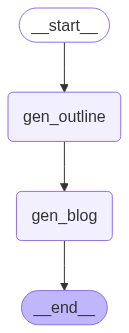

In [22]:
Image(workflow.get_graph().draw_mermaid_png())